# A chained LLM app
Here we are attempting to generate a blog using LangGraph. The LLM will first be prompted to generate an outline. The LLM will then elaborate upon the outline to give us a finished blog.

### 1. Import dependencies

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama.chat_models import ChatOllama
from typing import TypedDict

In [2]:
# For graphical visualization of the state graph
 
import nest_asyncio
nest_asyncio.apply()
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import Image

### 2. Linking the model

In [3]:
model = ChatOllama(model="gemma:2b")

### 3. Create a state

In [4]:
class BlogState(TypedDict):                      # The BlogState inherits a TypedDict
    topic: str
    outline: str
    blog: str

### 4. Define the function for the graph node

In [5]:
def llm_outline(state: BlogState) -> BlogState:
    # Extract the question from the state
    topic = state["topic"]


    # Form a prompt
    prompt = f"I require an outline for a blog on {topic}."


    # Ask the question to the model
    outline = model.invoke(prompt).content


    # Update the state with the answer
    state['outline'] = outline

    return state


def llm_blog(state: BlogState) -> BlogState:
    # Extract the outline from the state
    outline = state["outline"]


    # Form a prompt
    prompt = f"Write a detailed blog based on the following outline:\n{outline}"


    # Ask the question to the model
    blog = model.invoke(prompt).content


    # Update the state with the answer
    state["blog"] = blog

    return state

### 5. Create the graph

In [6]:
# Declare the graph:
graph = StateGraph(BlogState)                    # The StateGraph takes the state as a parameter, signifying that the "state" will be exchanged between the nodes through the edges.

# Add a nodes/states to the graph:
graph.add_node("llm_outline", llm_outline)
graph.add_node("llm_blog", llm_blog)


# Add edges to the graph:
graph.add_edge(START, 'llm_outline')
graph.add_edge('llm_outline', 'llm_blog')
graph.add_edge('llm_blog', END)

### 6. Compile the graph

In [7]:
workflow = graph.compile()

### 7. The Graph 

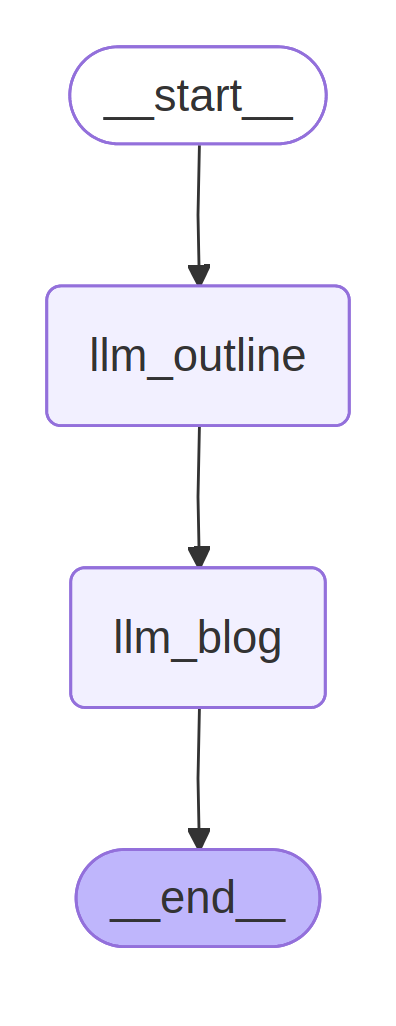

In [8]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER))

### 8. Run the code

In [9]:
initial_state = { "topic" : "Motorcycles" }

final_state = workflow.invoke(initial_state)

print(final_state)


{'topic': 'Motorcycles', 'outline': '## Motorcycle Blog Outline\n\n**I. Introduction**\n* What are motorcycles?\n* Brief history of motorcycles\n* Different types of motorcycles\n* The allure of motorcycles\n\n**II. Motorcycle History and Culture**\n* The evolution of motorcycles\n* Famous motorcycle brands and historical figures\n* Motorcycle culture and community\n* Different riding styles\n\n**III. Motorcycle Mechanics and Technology**\n* Engine and its components\n* Transmission and drivetrain\n* Suspension and braking systems\n* Wheels and tires\n* Electrical and lighting systems\n\n**IV. Motorcycle Riding and Safety**\n* Basic riding skills and techniques\n* Highway riding and long-distance travel\n* Motorcycle maintenance and safety\n* The importance of helmets and protective gear\n\n**V. Motorcycle Maintenance and Repair**\n* Oil changes and maintenance\n* Engine tune-ups and replacements\n* Suspension adjustments and tire replacement\n* Basic electrical troubleshooting\n\n**VI

In [10]:
print(final_state["outline"])

## Motorcycle Blog Outline

**I. Introduction**
* What are motorcycles?
* Brief history of motorcycles
* Different types of motorcycles
* The allure of motorcycles

**II. Motorcycle History and Culture**
* The evolution of motorcycles
* Famous motorcycle brands and historical figures
* Motorcycle culture and community
* Different riding styles

**III. Motorcycle Mechanics and Technology**
* Engine and its components
* Transmission and drivetrain
* Suspension and braking systems
* Wheels and tires
* Electrical and lighting systems

**IV. Motorcycle Riding and Safety**
* Basic riding skills and techniques
* Highway riding and long-distance travel
* Motorcycle maintenance and safety
* The importance of helmets and protective gear

**V. Motorcycle Maintenance and Repair**
* Oil changes and maintenance
* Engine tune-ups and replacements
* Suspension adjustments and tire replacement
* Basic electrical troubleshooting

**VI. Choosing the Right Motorcycle**
* Factors to consider when buying a 

In [11]:
print(final_state["blog"])

## Motorcycle Blog: Exploring the World of Two Wheels

**Introduction:**

Motorcycles, with their captivating design and enduring appeal, have become more than just means of transportation. From the thrilling roar of their engines to the camaraderie of fellow riders, motorcycles offer a unique and exhilarating experience that transcends mere practicality. This blog delves into the fascinating world of motorcycles, exploring their rich history, mechanics, riding tips, maintenance, and the vibrant culture surrounding these two-wheeled wonders.

**The History of Motorcycles:**

The origins of motorcycles can be traced back to the 18th century with the invention of the internal combustion engine. Early motorcycles were steam-powered, but internal combustion engines emerged as a more efficient and reliable power source, paving the way for the modern-day motorcycle.

**The Allure of Motorcycles:**

The allure of motorcycles stems from several factors. They offer a sense of freedom, adventure